<a href="https://colab.research.google.com/github/maleehahassan/HIDA_Into_to_DL/blob/main/01_networks_as_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview: Penguin Species Classification with Neural Networks

This notebook demonstrates how to build a neural network to classify penguin species using the Palmer Penguins dataset. The workflow includes:

- **Data Loading & Exploration**: The dataset is loaded and visualized to understand relationships between features and species.
- **Preprocessing**: Irrelevant columns are dropped, missing values are removed, and the target variable ('species') is one-hot encoded for classification.
- **Data Splitting**: The data is split into training and test sets, stratified by species to maintain class balance.
- **Model Building**: A simple feedforward neural network is constructed using TensorFlow/Keras, with one hidden layer and a softmax output for multiclass classification.
- **Training**: The model is trained for 100 epochs, and training loss is visualized to monitor learning progress.
- **Prediction & Evaluation**: Predictions are made on the test set, and the model's performance is evaluated using a confusion matrix and heatmap to show classification accuracy for each species.

This notebook guides learners through the process of preparing data, building and training a neural network for multiclass classification, and evaluating results using visual tools.

In [ ]:
# Import seaborn for data visualization
import seaborn as sns

In [ ]:
# Load the penguins dataset from seaborn
penguins = sns.load_dataset('penguins')

In [1]:
# Visualize pairwise relationships in the dataset, colored by species
sns.pairplot(penguins, hue="species")

NameError: name 'sns' is not defined

In [ ]:
# Convert the 'species' column to a categorical data type
penguins['species'] = penguins['species'].astype('category')

In [ ]:
# Drop two columns and the rows that have NaN values in them
# Drop the 'island' and 'sex' columns, then remove rows with missing values
penguins_filtered = penguins.drop(columns=['island', 'sex']).dropna()

# Extract columns corresponding to features
# Extract feature columns (all except 'species') for model input
penguins_features = penguins_filtered.drop(columns=['species'])


In [ ]:
# Import pandas for data manipulation
import pandas as pd

# Convert the target variable 'species' to one-hot encoded format
target = pd.get_dummies(penguins_filtered['species'])

# Display the first 5 rows of the one-hot encoded target
target.head() # print out the top 5 to see what it looks like.

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0


In [ ]:
# Import train_test_split to split data into training and test sets
from sklearn.model_selection import train_test_split

# Split features and target into training and test sets, stratified by species
X_train, X_test, y_train, y_test = train_test_split(penguins_features, target,test_size=0.2, random_state=0, shuffle=True, stratify=target)


In [ ]:
# Print the count of each species in the full target set
print(target.value_counts())

Adelie  Chinstrap  Gentoo
1       0          0         151
0       0          1         123
        1          0          68
dtype: int64


In [ ]:
# Print the count of each species in the training set
print(y_train.value_counts())

Adelie  Chinstrap  Gentoo
1       0          0         121
0       0          1          98
        1          0          54
dtype: int64


In [ ]:
# Print the count of each species in the test set
print(y_test.value_counts())

Adelie  Chinstrap  Gentoo
1       0          0         30
0       0          1         25
        1          0         14
dtype: int64


In [ ]:
# Import keras for building neural networks
from tensorflow import keras

2022-03-24 14:53:34.901173: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-24 14:53:34.901196: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
# Set random seeds for reproducibility
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)


In [ ]:
# Define the input layer with the shape of the feature set
inputs = keras.Input(shape=X_train.shape[1])

In [ ]:
# Add a hidden layer with 10 units and ReLU activation
hidden_layer = keras.layers.Dense(10, activation="relu")(inputs)

2022-03-24 14:53:52.998317: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-24 14:53:52.998355: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-24 14:53:52.998390: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fwc049): /proc/driver/nvidia/version does not exist
2022-03-24 14:53:52.998691: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Add an output layer with 3 units (one for each species) and softmax activation
output_layer = keras.layers.Dense(3, activation="softmax")(hidden_layer)

In [ ]:
# Build the model by specifying the input and output layers
model = keras.Model(inputs=inputs, outputs=output_layer)

# Display the model architecture
model.summary()


NameError: name 'keras' is not defined

In [ ]:
# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy())

In [ ]:
# Train the model on the training set for 100 epochs
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 872us/step - loss: 2847.6536
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 2664.8521
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 2485.5144
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 2316.3879
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 2152.2834
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 1997.5701
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 1846.1864
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 1703.0428
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 1564.8324
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 1431.5043
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 1304.5566
Epoch 12/100
9/9 [==============================] - 0s 3ms/step - loss: 1179.7638
Epoch 13/100
9/9 [=====

<AxesSubplot:>

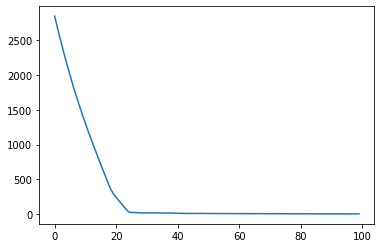

In [ ]:
# Plot the training loss over epochs
sns.lineplot(x=history.epoch, y=history.history['loss'])

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to a DataFrame for easier analysis
prediction = pd.DataFrame(y_pred, columns=target.columns)
prediction


,Adelie,Chinstrap,Gentoo
0,0.999959,3.145384e-08,0.000041
1,0.983229,2.182941e-03,0.014589
2,0.999927,1.489848e-06,0.000072
3,0.035936,2.511022e-04,0.963813
4,0.953155,2.092342e-02,0.025921
...,...,...,...
64,0.001576,9.657354e-01,0.032689
65,0.043844,7.111577e-01,0.244998
66,0.153391,7.815813e-01,0.065027
67,0.491370,3.551965e-05,0.508595


In [ ]:
# Get the species with the highest predicted probability for each observation
predicted_species = prediction.idxmax(axis="columns")
predicted_species


0        Adelie
1        Adelie
2        Adelie
3        Gentoo
4        Adelie
        ...    
64    Chinstrap
65    Chinstrap
66    Chinstrap
67       Gentoo
68       Adelie
Length: 69, dtype: object

In [ ]:
# Import confusion_matrix to evaluate model performance
from sklearn.metrics import confusion_matrix

# Get the true species labels for the test set
true_species = y_test.idxmax(axis="columns")

# Compute the confusion matrix
matrix = confusion_matrix(true_species, predicted_species)
print(matrix)


[[16 14  0]
 [ 6  6  2]
 [12  0 13]]


In [ ]:
# Convert to a pandas dataframe
confusion_df = pd.DataFrame(matrix, index=y_test.columns.values, columns=y_test.columns.values)

# Set the names of the x and y axis, this helps with the readability of the heatmap.
confusion_df.index.name = 'True Label'
confusion_df.columns.name = 'Predicted Label'


<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

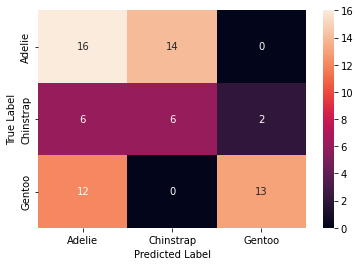

In [ ]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(confusion_df, annot=True)